In [1]:
#导入包
# import pandas as pd
# import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
# import data
train = pd.read_csv("F:\\python_learning\\titanic\\train.csv")
test = pd.read_csv("F:\\python_learning\\titanic\\test.csv")

In [3]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [4]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Text(0.5,1,'Survived')

Text(0,0.5,'')

Text(0.5,1,'Survived')

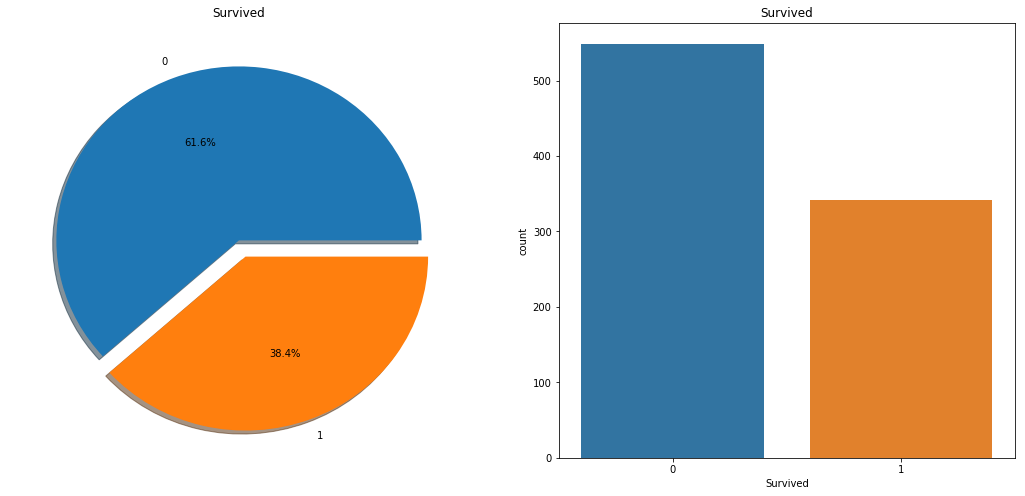

In [6]:
f,ax = plt.subplots(1,2,figsize = (18,8)) #子图
train['Survived'].value_counts().plot.pie(explode = [0,0.1],autopct = "%1.1f%%",ax = ax[0],shadow = True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data = train,ax=ax[1])
ax[1].set_title('Survived')
# plt.show()

In [7]:
# 离散值groupby
train.groupby(['Sex','Survived'])['Survived'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5,1,'Survived vs sex')

Text(0.5,1,'Sex:Survived vs Dead')

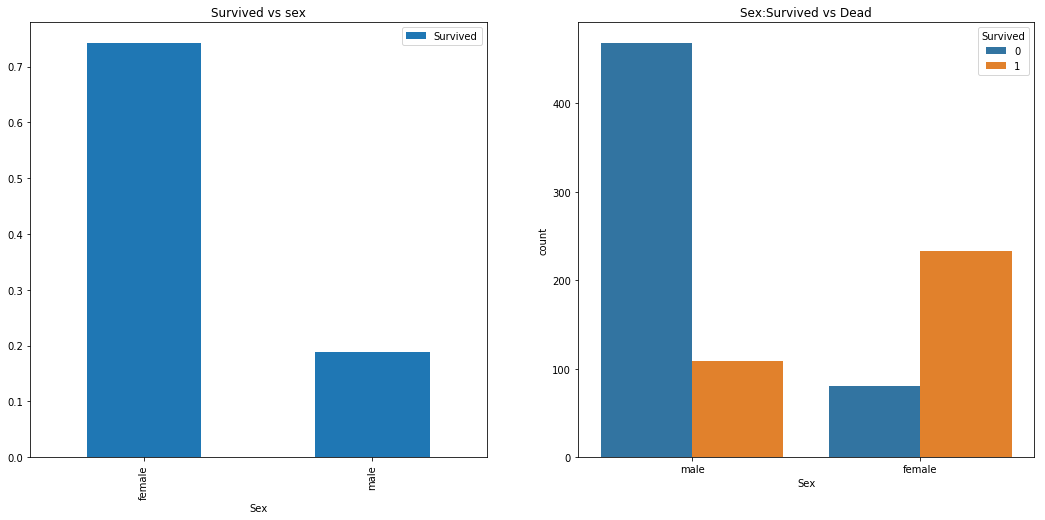

In [8]:
f,ax = plt.subplots(1,2,figsize = (18,8)) #子图
train[['Sex','Survived']].groupby(['Sex']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs sex')
sns.countplot('Sex',hue = 'Survived',data = train,ax=ax[1])
ax[1].set_title('Sex:Survived vs Dead')
# plt.show()

In [9]:
# crosstable
pd.crosstab(train.Pclass,train.Survived,margins = True).style.background_gradient(cmap = 'summer_r')
# pd.crosstab(train.Sex,train.Survived,margins = True).style.background_gradient(cmap = 'summer_r')

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Text(0.5,1,'Survived vs Pclass')

Text(0.5,1,'Pclass:Survived vs Dead')

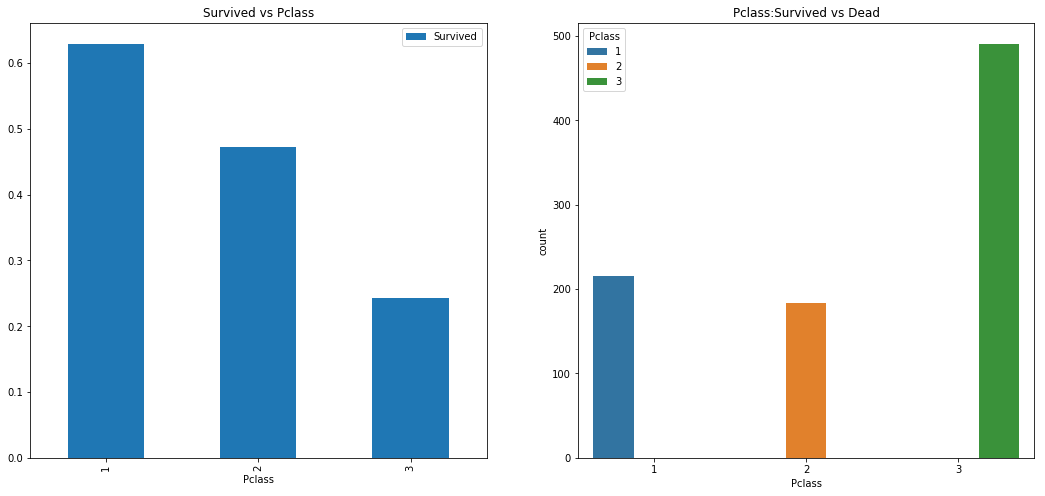

In [10]:
f,ax = plt.subplots(1,2,figsize = (18,8)) #子图
train[['Pclass','Survived']].groupby(['Pclass']).mean().plot.bar(ax = ax[0])
ax[0].set_title('Survived vs Pclass')
sns.countplot('Pclass',hue = 'Pclass',data = train,ax=ax[1])
ax[1].set_title('Pclass:Survived vs Dead')
# plt.show()

In [11]:
pd.crosstab([train.Sex,train.Survived],train.Pclass,margins = True).style.background_gradient(cmap = 'summer_r')

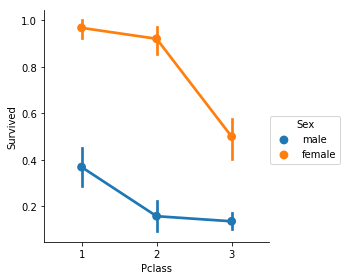

In [12]:
sns.factorplot('Pclass','Survived',hue = 'Sex',data = train)
# plt.show()

Text(0.5,1,'Pclass and Age vs Survived')

Text(0.5,1,'Sex and Age vs Survived')

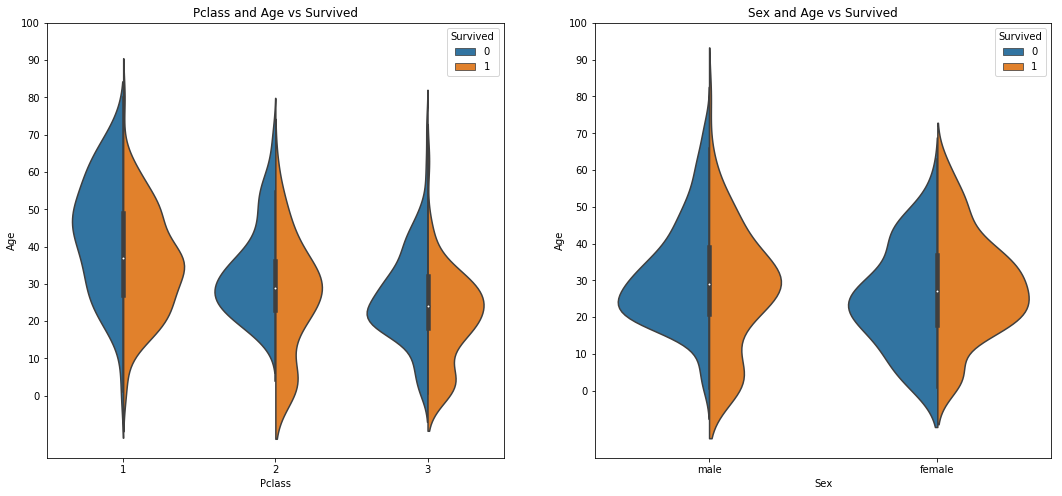

In [15]:
# 连续性变量
f,ax = plt.subplots(1,2,figsize = (18,8)) #子图
sns.violinplot('Pclass','Age',hue = 'Survived',data = train,split = True,ax = ax[0])
ax[0].set_title('Pclass and Age vs Survived')
ax[0].set_yticks(range(0,110,10))
sns.violinplot('Sex','Age',hue = 'Survived',data = train,split = True,ax = ax[1])
ax[1].set_title('Sex and Age vs Survived')
ax[1].set_yticks(range(0,110,10))
# plt.show()

In [16]:
# 缺失值补充
# 多余30%左右直接提出
# 均值/众数/经验值/回归预测/分组找接近值
train['Initial'] = 0
for i in train:
    train['Initial'] = train.Name.str.extract('([A-Za-z]+)\.')

In [18]:
pd.crosstab(train.Initial,train.Sex).T

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [20]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr'],inplace=True)

In [25]:
train.groupby('Initial')['Age'].mean()

Initial
Master     4.574167
Miss      21.860000
Mr        32.739609
Mrs       35.981818
Other     45.888889
Name: Age, dtype: float64

In [27]:
train.loc[(train.Age.isnull())&(train.Initial == 'Mr'),'Age'] =33
train.loc[(train.Age.isnull())&(train.Initial == 'Master'),'Age'] =5
train.loc[(train.Age.isnull())&(train.Initial == 'Miss'),'Age'] =22
train.loc[(train.Age.isnull())&(train.Initial == 'Mrs'),'Age'] =36
train.loc[(train.Age.isnull())&(train.Initial == 'Other'),'Age'] =46

In [28]:
train['Age'].isnull().any()

False